In [1]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
PATH = '/mnt/data/datasets/SOCC/annotated/constructiveness/SFU_constructiveness_toxicity_corpus.csv'

In [3]:
df = pd.read_csv(PATH)

In [4]:
df

,article_id,comment_counter,title,globe_url,url,comment_text,is_constructive,is_constructive:confidence,toxicity_level,toxicity_level:confidence,did_you_read_the_article,did_you_read_the_article:confidence,annotator_comments,expert_is_constructive,expert_toxicity_level,expert_comments
0,23462276,source1_23462276_4,Apple Watch: It's the precise opposite of a la...,http://www.theglobeandmail.com/opinion/as-tech...,http://www.sfu.ca/content/dam/sfu/discourse-la...,"While technology does march on, sometimes it t...",yes,1.0000,1,1,1,1.0,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n,NaN,NaN,NaN
1,23462276,source1_23462276_10,Apple Watch: It's the precise opposite of a la...,http://www.theglobeandmail.com/opinion/as-tech...,http://www.sfu.ca/content/dam/sfu/discourse-la...,Everyone is still missing the point of what th...,yes,1.0000,1\n2,0.9111\n0.0889,1,1.0,\n\n\n\n\n\n\n\n\n\n,NaN,NaN,NaN
2,23462276,source1_23462276_11_1,Apple Watch: It's the precise opposite of a la...,http://www.theglobeandmail.com/opinion/as-tech...,http://www.sfu.ca/content/dam/sfu/discourse-la...,You've never used an Apple product have you?,no,1.0000,1\n2,0.6308\n0.2937,1,1.0,\n\n\n\n\n\n\n\n\n\n\n\n\n,NaN,NaN,NaN
3,23462276,source1_23462276_25,Apple Watch: It's the precise opposite of a la...,http://www.theglobeandmail.com/opinion/as-tech...,http://www.sfu.ca/content/dam/sfu/discourse-la...,You may be using a blackberry. I'm still using...,no,1.0000,1\n2,0.7346\n0.2023,1,1.0,\n\n\n\n\n\n\n\n\n\n\n\n\n\n,NaN,NaN,NaN
4,26373964,source1_26373964_63,Don't be fooled by the (surprise!) budget surplus,http://www.theglobeandmail.com/opinion/dont-be...,http://www.sfu.ca/content/dam/sfu/discourse-la...,"Of course we all know, unfortunately, there is...",no,0.5963,2\n1,0.4429\n0.3066,1,1.0,\n\n\n\n\n\n,NaN,NaN,NaN
5,26373964,source1_26373964_152,Don't be fooled by the (surprise!) budget surplus,http://www.theglobeandmail.com/opinion/dont-be...,http://www.sfu.ca/content/dam/sfu/discourse-la...,Simpson claims the budget surplus isn't a surp...,yes,0.8805,1\n2,0.5102\n0.2344,1,1.0,\n\n\n\n\n\n\n,NaN,NaN,NaN
6,20144737,source1_20144737_7_0_0,Enough is enough: Time to address epidemic of ...,http://www.theglobeandmail.com/opinion/put-nat...,http://www.sfu.ca/content/dam/sfu/discourse-la...,We have multiple generations where aboriginal ...,yes,1.0000,1\n2,0.8317\n0.1155,1,1.0,\nThis is a topic I have researced and studied...,yes,1.0,NaN
7,20144737,source1_20144737_7,Enough is enough: Time to address epidemic of ...,http://www.theglobeandmail.com/opinion/put-nat...,http://www.sfu.ca/content/dam/sfu/discourse-la...,A good start to stop Violence against women an...,yes,0.6179,1\n2,0.7799\n0.1531,1,1.0,\n\n\n\n\n\n\n\n\n\n\n\n,no,2.0,"I don't see any solutions being offered here, ..."
8,20144737,source1_20144737_8,Enough is enough: Time to address epidemic of ...,http://www.theglobeandmail.com/opinion/put-nat...,http://www.sfu.ca/content/dam/sfu/discourse-la...,All of this energy should be directed at the p...,yes,0.7861,1\n2,0.7758\n0.2242,1,1.0,\nThis does promote further discussion althoug...,no,4.0,"This is really insulting, and I don't see any ..."
9,20144737,source1_20144737_8_0,Enough is enough: Time to address epidemic of ...,http://www.theglobeandmail.com/opinion/put-nat...,http://www.sfu.ca/content/dam/sfu/discourse-la...,Time for the elders and chiefs to stand up to ...,yes,0.5000,1,1,1,1.0,This is something that can warrant further dis...,no,3.0,NaN


In [5]:
imp_cols = ['is_constructive']

In [6]:
df_a = df[[*imp_cols]]

In [7]:
df_a

,is_constructive
0,yes
1,yes
2,no
3,no
4,no
5,yes
6,yes
7,yes
8,yes
9,yes


In [8]:
df_aa = df_a.apply(pd.value_counts)

In [9]:
df_aa

,is_constructive
yes,554
no,489


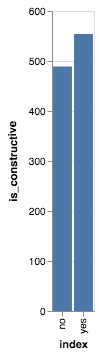

In [10]:
for i_c in imp_cols:
    c = alt.Chart(df_aa.reset_index()).mark_bar().encode(
        x="index",
        y=i_c,
    )
    c.display()

In [12]:
# df.groupby('commentid').count()

In [11]:
exp = df[['is_constructive', 'comment_text']]
exp['is_constructive'] = exp['is_constructive'].replace('yes', 1).replace('no', 0)
exp = exp.dropna()

/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
exp

,is_constructive,comment_text
0,1,"While technology does march on, sometimes it t..."
1,1,Everyone is still missing the point of what th...
2,0,You've never used an Apple product have you?
3,0,You may be using a blackberry. I'm still using...
4,0,"Of course we all know, unfortunately, there is..."
5,1,Simpson claims the budget surplus isn't a surp...
6,1,We have multiple generations where aboriginal ...
7,1,A good start to stop Violence against women an...
8,1,All of this energy should be directed at the p...
9,1,Time for the elders and chiefs to stand up to ...


In [14]:
from pathlib import Path
EX_PA = Path('/mnt/data/group07/johannes/socc_proc/')

exp[:900].to_csv(EX_PA/'train.csv', header=False, index=False)
exp[900:].to_csv(EX_PA/'valid.csv', header=False, index=False)